## Installing Prophet

In [1]:
!pip install prophet

## Importing Necessary Libaries

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

from prophet.plot import plot_plotly , plot_components_plotly
from prophet import Prophet


## Read Excel File into Notebook


In [3]:
data = pd.read_excel('Gold Rate.xlsx')
data.head()

,Date,1 grm(24 k),8 Grm()24 k,1 grm(22 k),8 grm (22 k)
0,2023-10-03,5760,46080,5290,42320
1,2023-10-02,5826,46608,5356,42848
2,2023-10-01,5830,46640,5360,42880
3,2023-09-30,5830,46640,5360,42880
4,2023-09-29,5860,46880,5390,43120


#### Chaning the datatype from Object to datemtime64

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10 non-null     datetime64[ns]
 1   1 grm(24 k)   10 non-null     int64         
 2   8 Grm()24 k   10 non-null     int64         
 3   1 grm(22 k)   10 non-null     int64         
 4   8 grm (22 k)  10 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 532.0 bytes


### Renaming the cloumn to specifie the data to predict

##### I have rename the columns From date to ds and  1 grm(24K)  to y
##### This will help to predict the specify data, what we require

In [6]:
data = data.rename(columns={'Date':'ds','1 grm(24 k)':'y'})

#### Assinging Model to Test the data and the data was in daily time series, Thats why use of daily_seasonlity model

In [7]:
model = Prophet(daily_seasonality = True)

### Fitting the The model

In [8]:
model.fit(data)

11:45:16 - cmdstanpy - INFO - Chain [1] start processing
11:45:17 - cmdstanpy - INFO - Chain [1] done processing


##### Forecating the model to known the future of the data and it was done for only 3 days because it is small data

In [23]:
future = model.make_future_dataframe(periods = 2)
forecast = model.predict(future)

##### Ploting the model in scatter line Chart

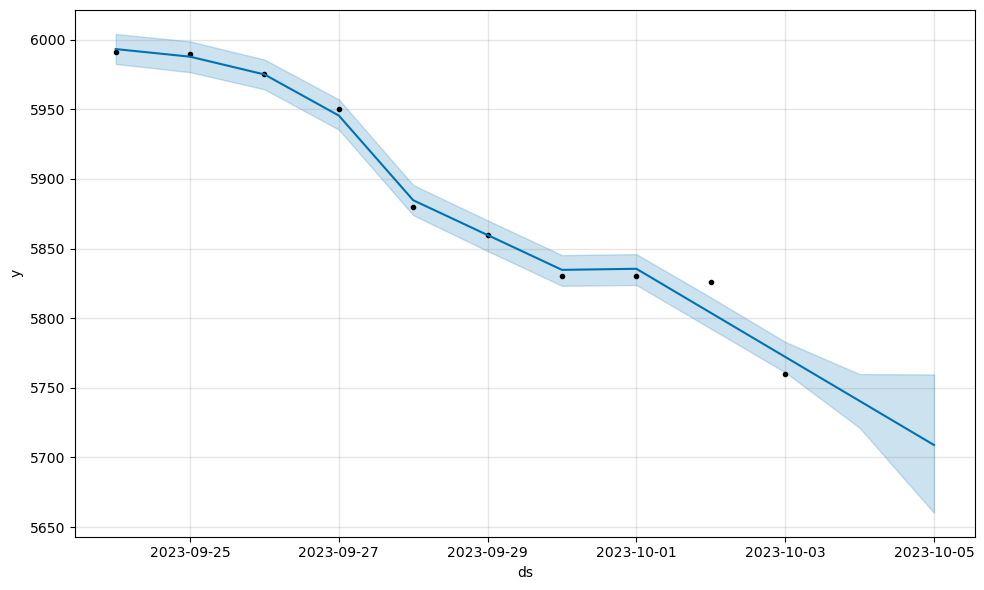

In [24]:
fig = model.plot(forecast)

##### Plot the component of data (Trend and statutory i.e daily base statutory of the data) of the Time series


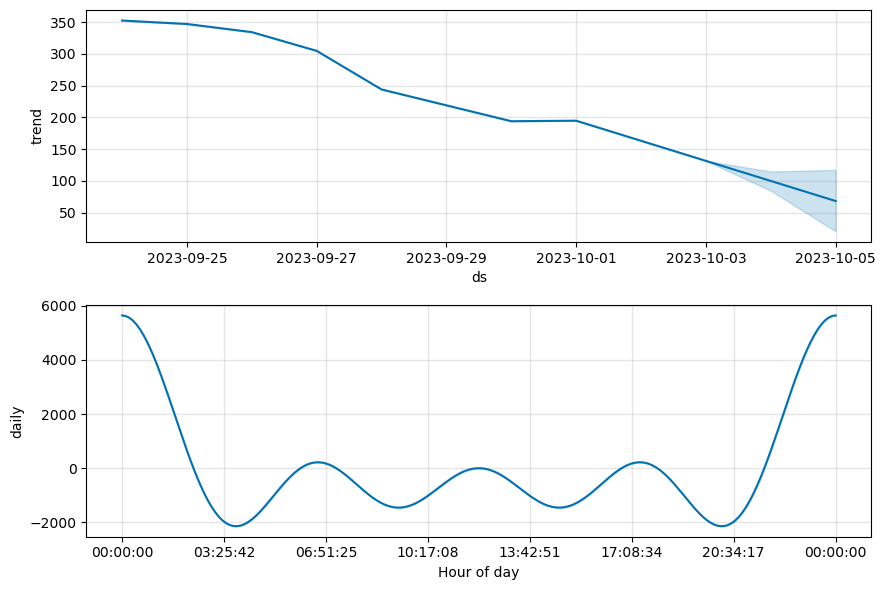

In [25]:
fig2 = model.plot_components(forecast)

##### Checking accuracy score with the help of  sklearn with the models of 
Root Mean Squared Error (RMSE) = 156.53505385722823  and 
Mean Absolute Error (MAE) = 134.65182297331694
#### Mean Absolute Error (MAE):

Represents the average absolute error between the observed actual outcomes and the predictions.
In this case, on average, the predictions are off by about 134.65 units from the actual values.

##### Root Mean Squared Error (RMSE):

Punishes larger errors more than the MAE because it squares the residuals (differences between predicted and actual values) before averaging them.
An RMSE of 156.54 indicates that the square root of the average squared errors is 156.54.
Typically, when RMSE is larger than MAE, it suggests there might be some larger errors that are influencing the RMSE more significantly than the MAE.

In [22]:
predictions = forecast['yhat'][-len(data):]  # Only the forecasted part
mae = mean_absolute_error(data['y'], predictions)
rmse = mean_squared_error(data['y'], predictions, squared=False)
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 134.65182297331694, RMSE: 156.53505385722823
